<a href="https://colab.research.google.com/github/martinjm81/pythonprojects/blob/statistics/martin(2025)_tabla_freq2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese los datos separados por comas: 10,20,25,45,35,50

Variable cuantitativa
Escala: Cuantitativa discreta

Numero de datos: 6
Rango: 40.0
Numero de clases (k): 3
Amplitud: 14.0

Tabla de frecuencias:
          Clase  fi  Fi        hi        Hi
0  [10.0, 24.0)   2   2  0.333333  0.333333
1  [24.0, 38.0)   2   4  0.333333  0.666667
2  [38.0, 52.0)   2   6  0.333333  1.000000


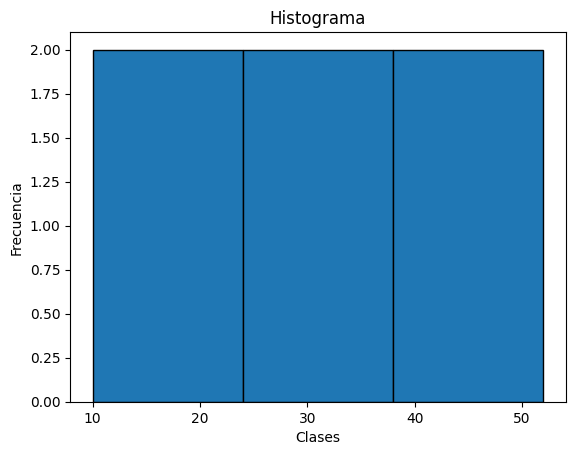


Medidas de posicion:
Cuartiles: [21.25 30.   42.5 ]
Deciles: [15.  20.  22.5 25.  30.  35.  40.  45.  47.5]
Percentiles: [10.5  15.5  20.25 22.75 25.5  30.5  35.5  40.5  45.25 47.75]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Ingreso de datos
# -------------------------------
datos = input("Ingrese los datos separados por comas: ").split(",")
datos = [d.strip() for d in datos]

# Intentamos convertir a numérico
datos_num = []
es_numerico = True
for d in datos:
    try:
        datos_num.append(float(d))
    except:
        es_numerico = False
        break

# -------------------------------
# 2. Identificación de variable
# -------------------------------
if es_numerico:
    print("\nVariable cuantitativa")

    # Determinamos si es discreta o continua
    if all(float(d).is_integer() for d in datos_num):
        print("Escala: Cuantitativa discreta")
    else:
        print("Escala: Cuantitativa continua")

    n = len(datos_num)
    rango = max(datos_num) - min(datos_num)
    k = int(1 + 3.322 * np.log10(n))  # Regla de Sturges
    amplitud = np.ceil(rango / k)

    print(f"\nNumero de datos: {n}")
    print(f"Rango: {rango}")
    print(f"Numero de clases (k): {k}")
    print(f"Amplitud: {amplitud}")

    # -------------------------------
    # 3. Construcción de tabla de frecuencias
    # -------------------------------
    bins = np.arange(min(datos_num), max(datos_num) + amplitud, amplitud)
    clases = pd.cut(datos_num, bins=bins, right=False)
    tabla = clases.value_counts().sort_index().reset_index()
    tabla.columns = ["Clase", "fi"]

    # Frecuencia acumulada (Fi), relativa (hi), acumulada relativa (Hi)
    tabla["Fi"] = tabla["fi"].cumsum()
    tabla["hi"] = tabla["fi"] / n
    tabla["Hi"] = tabla["hi"].cumsum()

    print("\nTabla de frecuencias:")
    print(tabla)

    # -------------------------------
    # 4. Histograma
    # -------------------------------
    plt.hist(datos_num, bins=bins, edgecolor="black")
    plt.title("Histograma")
    plt.xlabel("Clases")
    plt.ylabel("Frecuencia")
    plt.show()

    # -------------------------------
    # 5. Medidas de posición
    # -------------------------------
    print("\nMedidas de posicion:")
    print("Cuartiles:", np.percentile(datos_num, [25, 50, 75]))
    print("Deciles:", np.percentile(datos_num, [10*i for i in range(1,10)]))
    print("Percentiles:", np.percentile(datos_num, [i for i in range(1,100,10)]))

else:
    print("\nVariable cualitativa")
    print("Escala: Cualitativa nominal u ordinal (según el contexto)")

    n = len(datos)
    tabla = pd.Series(datos).value_counts().reset_index()
    tabla.columns = ["Categoria", "fi"]
    tabla["Fi"] = tabla["fi"].cumsum()
    tabla["hi"] = tabla["fi"] / n
    tabla["Hi"] = tabla["hi"].cumsum()

    print("\nTabla de frecuencias:")
    print(tabla)
